In [143]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_squared_error, make_scorer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

import warnings
warnings.filterwarnings('ignore')

### Load the dataset

- Load the train data and using all your knowledge of pandas try to explore the different statistical properties like correlation of the dataset.

In [117]:
train = pd.read_csv('train.csv')
train.head()

,Id,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Longtitude,Regionname,Propertycount
0,124,3,2,995000,1,135,6.3,3143,2,2,0,100.0,1998,26,145.01600,5,4836
1,5905,2,0,1080000,1,155,2.0,3066,1,0,0,94.0,1890,31,144.98863,2,4553
2,5963,3,0,725000,1,196,17.9,3082,2,2,602,129.0,1980,29,145.06912,2,10529
3,3521,4,0,1330000,1,251,8.0,3016,3,2,217,266.0,2003,10,144.87960,6,6380
4,3738,3,0,620000,1,221,12.4,3060,1,2,604,190.0,1970,23,144.96860,2,5070


In [118]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4781 entries, 0 to 4780
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             4781 non-null   int64  
 1   Rooms          4781 non-null   int64  
 2   Type           4781 non-null   int64  
 3   Price          4781 non-null   int64  
 4   Method         4781 non-null   int64  
 5   SellerG        4781 non-null   int64  
 6   Distance       4781 non-null   float64
 7   Postcode       4781 non-null   int64  
 8   Bathroom       4781 non-null   int64  
 9   Car            4781 non-null   int64  
 10  Landsize       4781 non-null   int64  
 11  BuildingArea   4781 non-null   float64
 12  YearBuilt      4781 non-null   int64  
 13  CouncilArea    4781 non-null   int64  
 14  Longtitude     4781 non-null   float64
 15  Regionname     4781 non-null   int64  
 16  Propertycount  4781 non-null   int64  
dtypes: float64(3), int64(14)
memory usage: 635.1 KB


In [119]:
train.drop('Id', axis = 1, inplace = True )

In [120]:
train.describe()

,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Longtitude,Regionname,Propertycount
count,4781.000000,4781.000000,4.781000e+03,4781.000000,4781.000000,4781.000000,4781.000000,4781.000000,4781.000000,4781.000000,4781.000000,4781.000000,4781.000000,4781.000000,4781.000000,4781.000000
mean,2.964861,0.540473,1.080936e+06,1.441330,131.485254,10.045367,3103.308931,1.587952,1.605522,480.500105,143.157231,1964.338423,13.609705,144.991934,3.772223,7477.201213
std,0.957911,0.837337,6.757098e+05,1.141898,77.203630,5.871496,87.538064,0.711276,0.946698,899.489722,91.438501,38.064151,10.389644,0.103051,2.024068,4395.746550
min,1.000000,0.000000,1.450000e+05,0.000000,2.000000,0.000000,3000.000000,1.000000,0.000000,0.000000,0.000000,1196.000000,-1.000000,144.545320,0.000000,389.000000
25%,2.000000,0.000000,6.300000e+05,1.000000,73.000000,6.100000,3044.000000,1.000000,1.000000,168.000000,94.000000,1940.000000,2.000000,144.927270,2.000000,4380.000000
50%,3.000000,0.000000,9.000000e+05,1.000000,135.000000,9.200000,3083.000000,1.000000,2.000000,411.000000,126.000000,1970.000000,15.000000,144.997500,5.000000,6567.000000
75%,4.000000,1.000000,1.337000e+06,1.000000,194.000000,13.000000,3147.000000,2.000000,2.000000,638.000000,172.000000,2000.000000,23.000000,145.055720,5.000000,10331.000000
max,8.000000,2.000000,9.000000e+06,4.000000,267.000000,47.300000,3977.000000,8.000000,10.000000,37000.000000,3112.000000,2018.000000,32.000000,145.445300,7.000000,21650.000000


In [121]:
train.isnull().sum()

Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Distance         0
Postcode         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

### No missing values

### Price Distribution

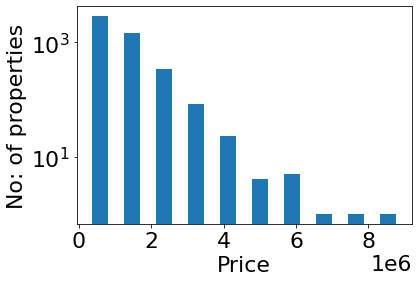

In [122]:
plt.yscale('log')
plt.hist(train.Price, rwidth = 0.5)
plt.xlabel('Price')
plt.ylabel('No: of properties')
plt.rcParams.update({'font.size': 22})
plt.show()

<AxesSubplot:xlabel='Bathroom', ylabel='count'>

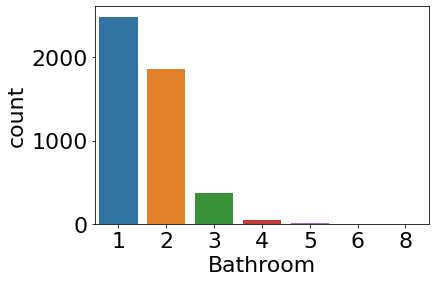

In [123]:
import seaborn as sns
sns.countplot('Bathroom', data = train)

## Model building

- Separate the features and target and then split the train data into train and validation set.
- Apply different models of your choice and  then predict on the validation data and find the `accuracy_score` for this prediction.
- Try improving upon the `accuracy_score` using different regularization techniques.

In [124]:
# Code starts here
X = train.drop('Price', axis = 1)
y = train['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 30)

### Linear Regression

In [125]:
LR = LinearRegression()
LR.fit(X_train, y_train)
preds = LR.predict(X_test)
rmse_LR = np.sqrt(mean_squared_error(preds, y_test))
acc_LR = r2_score(y_test, preds)
print(acc_LR)

0.6515846211927984


In [172]:
poly_model = make_pipeline(PolynomialFeatures(2, include_bias=False), LinearRegression())
poly_model.fit(X_train[:], y_train)
preds = poly_model.predict(X_test)
rmse_LR = np.sqrt(mean_squared_error(preds, y_test))
acc_LR = r2_score(y_test, preds)
print(acc_LR)

0.7455794900467798


In [132]:
LS = Lasso()
LS.fit(X_train, y_train)
preds = LS.predict(X_test)
rmse_LS = np.sqrt(mean_squared_error(preds, y_test))
acc_LS = r2_score(y_test, preds)
print(acc_LS)

0.6515853190380507


In [133]:
sum(LS.coef_ == 0)

0

In [134]:
RD = Ridge()
RD.fit(X_train, y_train)
preds = RD.predict(X_test)
rmse_RD = np.sqrt(mean_squared_error(preds, y_test))
acc_RD = r2_score(y_test, preds)
print(acc_RD)

0.6517678110784506


In [141]:
scorer = make_scorer(mean_squared_error, greater_is_better=False)
rmse_LR = -np.mean(cross_val_score(LR, X_train, y_train, scoring=scorer, cv = 10))
rmse_LS = -np.mean(cross_val_score(LS, X_train, y_train, scoring=scorer, cv = 10))
rmse_RD = -np.mean(cross_val_score(RD, X_train, y_train, scoring=scorer, cv = 10))
print(rmse_LR, rmse_LS, rmse_RD)

198194324531.22482 198194810000.91135 198317318558.85892


In [177]:
ridge_lambdas = [0.03, 0.06, 0.1, 0.001, 0.0001]
lasso_lambdas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01]

# Code starts here
# instantiate lasso and ridge models
lasso_model = Lasso()
ridge_model = Ridge()

# grid search on lasso and ridge
lasso_grid = GridSearchCV(lasso_model, param_grid = dict(alpha = lasso_lambdas))
ridge_grid = GridSearchCV(ridge_model, param_grid = dict(alpha = ridge_lambdas))


# make predictions 
lasso_grid.fit(X_train, y_train)
lasso_pred = lasso_grid.predict(X_test)

ridge_grid.fit(X_train, y_train)
ridge_pred = ridge_grid.predict(X_test)

lasso_rmse = np.sqrt(mean_squared_error(lasso_pred, y_test))
ridge_rmse = np.sqrt(mean_squared_error(ridge_pred, y_test))

# print out which is better
best_model =  'Lasso' if lasso_rmse < ridge_rmse else 'Ridge'
print(best_model)


Ridge


In [178]:
lasso_grid.best_estimator_

Lasso(alpha=0.0001)

In [179]:
ridge_model.fit(X_train, y_train)
preds = ridge_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(preds, y_test))
print(rmse)
print(r2_score(y_test, preds))

388028.2231964181
0.6517678110784506


In [171]:
lasso_model.fit(X_train, y_train)
preds = lasso_model.predict(X_test)
print(r2_score(y_test, preds))

0.6515853190380507


### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [190]:
# Code starts here
test = pd.read_csv('test.csv')
id_column = test['Id']
test.drop(['Id'], axis =1, inplace = True)
preds = ridge_grid.predict(test)
final = pd.DataFrame({'Id' : id_column, 'Price' : preds})
final.to_csv('sample_submission.csv', index=False)






# Code ends here.